# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

Loading the traffic signs data
Random example: Speed limit (120km/h)


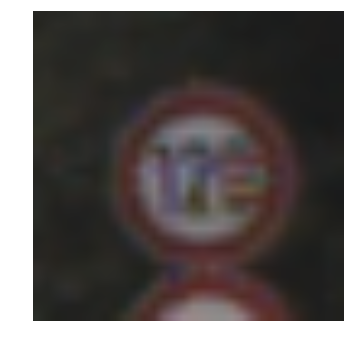

In [1]:
# Load pickled data
import os
import pickle
import random
    
import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
% autoreload 2
% matplotlib inline

# Fill this in based on where you saved the training and testing data
print("Loading the traffic signs data")
data_folder = 'traffic-signs-data'
training_file = os.path.join(data_folder, 'train.p')
testing_file = os.path.join(data_folder, 'test.p')
sign_name_file = os.path.join(data_folder, 'signnames.csv')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# get the description of each sign from the CSV
sign_names = {}
with open(sign_name_file, 'r') as f:
    f.readline()
    for line in f.readlines():
        sign_id, sign_desc = line.split(',')
        sign_names[int(sign_id)] = sign_desc.strip()
        

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_validation = y_validation = None

img_num = random.randint(0, len(X_train))
image = X_train[img_num]
value = y_train[img_num]
plt.axis('off')

plt.imshow(image)
print("Random example:", sign_names[value])


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# Number of training examples
from collections import Counter

import pandas as pd
from IPython.core.display import display

n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.

n_classes = len(np.unique(y_train))
assert n_classes == len(sign_names)
additional_data_added = False

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

,sign type,# in the training set
0,Speed limit (20km/h),210
1,Speed limit (30km/h),2220
2,Speed limit (50km/h),2250
3,Speed limit (60km/h),1410
4,Speed limit (70km/h),1980
5,Speed limit (80km/h),1860
6,End of speed limit (80km/h),420
7,Speed limit (100km/h),1440
8,Speed limit (120km/h),1410
9,No passing,1470


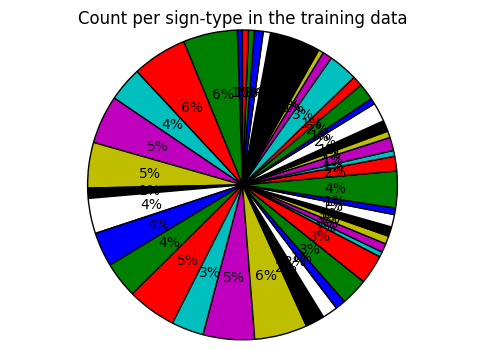

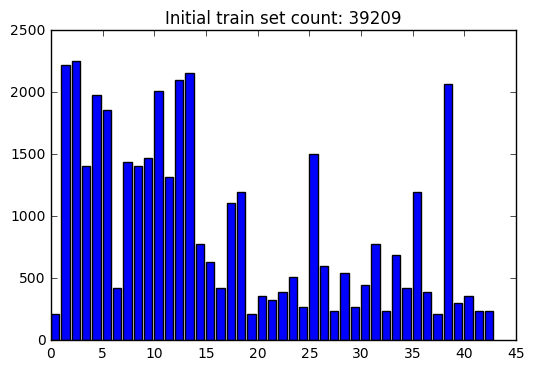

In [3]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
% matplotlib inline

# Let's count the # of sign per each type 
count_per_type = Counter(y_train)
count_table = pd.DataFrame(
    [
        [sign_names[sign_id], count] for sign_id, count in count_per_type.items()
        ]
)

count_table.columns  = ['sign type', '# in the training set']
display(count_table)

item, count = np.unique(y_train, return_counts=True)

plt.pie(list(count_per_type.values()),
        autopct='%1.0f%%',
        shadow=False, startangle=90)
plt.axis('equal')
plt.title('Count per sign-type in the training data')
plt.show()

# and a bar chart
plt.bar(item, count)
plt.title('Initial train set count: %d' % n_train)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Annotation for 14028: No passing


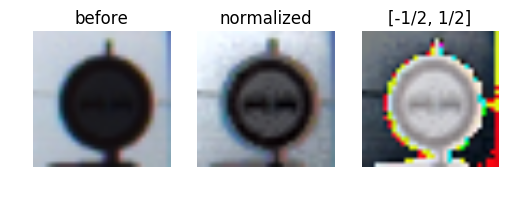

In [4]:
# Preprocess the data here.
import cv2
import matplotlib.patches as patches

img_num = random.randint(0, n_train)
# img_num = 16086

image = X_train[img_num]
value = y_train[img_num]
sizes, coords = train['sizes'], train['coords']

def normalize_color(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    # and bring back to BGR
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    return img_output
    

def process_image(image, plot=True, mean_correction=True):
#     return image.reshape([32, 32, 3]) # test: just return the same color image
    if plot:
        # show the original
        plt.figure()
        plt.subplot(131)
        plt.title('before')
        plt.axis('off')
        plt.imshow(image)

    after = image.copy()
    after = normalize_color(after)

    # useful function working with grayscale
    # after = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) # experiment with grayscale only
    # cv2.normalize(image, dst=after, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    # after = cv2.equalizeHist(after) # with grayscale equalization was useful
    
    if plot:
        plt.subplot(132)
        plt.title("normalized")
        plt.axis('off')
        plt.imshow(after)
    
    # normalize pixels to make them [-.5, 0.5]
    if mean_correction:
        after = after/255
        after = after - 0.5

        if plot:
            # show the final
            plt.subplot(133)
            plt.title('[-1/2, 1/2]')
            plt.axis('off')
            plt.imshow(after)
            plt.show()
        
    return after

print("Annotation for %d:" % img_num, sign_names[value])
_ = process_image(image)


In [5]:
from tqdm import tqdm
# change the whole training set
#print("Preprocessing test set")

def normalize(dataset, message=None):
    result = []
    if message:
        tqdm.write(message)
    with tqdm(total=len(dataset)) as pbar:
        for image in dataset:
            result.append(
                process_image(image, plot=False)
            )

            pbar.update()
    return np.array(result)

# Normalizing the train set
X_train_ = normalize(X_train)
# Normalizing the test set
X_test_ = normalize(X_test)

100%|██████████| 12630/12630 [00:00<00:00, 18117.80it/s]


### Question 1 

Describe how you preprocessed the data. Why did you choose that technique?

**Answer:**

In the reported paper "Traffic Sign Recognition with Multi-Scale Convolutional Networks" is reported how is often convenient to discard color information.

I made some test, converting to grayscale and normalizing/adjusting the levels to have coherent images across the datasets.

I also tried to keep the color information, highlighting the edges overlaying a canny detected edges, but with a lot of samples of this dataset the image was so noisy that the edge detection ended up to highlight image artifacts.
It would be possibly a good idea with more defined datasets.

I ended up keeping the color informations, that seems valuable, and normalizing them to adjust the luminosity first (converting to YUV, adjusting the Y channel and reconverting to BGR), and then normalizing the values to keep them in the [-0.5,+0.5] range - that helps with the weights.

A final test was to use the given "sign bounding box": to try to exclude everything is not in the sign in the train process. We can create alternative images for the train set, changing the background, to tell the neural-net that what's in the background is not important.

This didn't helped significatively, and with the additional images added (see below) it was less important.

In [6]:
### and split the data into training/validation/testing sets here.

# Let's split the training in training+validation
# keep part of the training for validation
# the remaining training set will be enhanced, and will end up to be 5 times bigger

from sdcnnet.mnist import shuffle

validation_size = 0.10

if X_validation is None:
    shuffle([X_train_, y_train])
    print ("Using {vsize}% of the {n_train} training set for validation".format(
        vsize = validation_size * 100,
            n_train = len(X_train_),
        ))

    from sklearn.model_selection import train_test_split

    
    X_train_, X_validation_, y_train, y_validation = train_test_split (
        X_train_, y_train,
        test_size=validation_size,
    )
    X_validation = X_validation_ # we don't care about the non-normalized validation values
else:
    print ("Validation dataset already chosen")

print ("Original Train size: %d" % n_train)
print ("new train size: %d" % len(X_train_))
print ("validation size (%d%%): %d" % (validation_size*100, len(X_validation_)))

data = dict(
    train = (X_train_, y_train),
    validation = (X_validation_, y_validation),
    test = (X_test_, y_test),
)


Using 10.0% of the 39209 training set for validation
Original Train size: 39209
new train size: 35288
validation size (10%): 3921


Generating additional by rotation of 35288


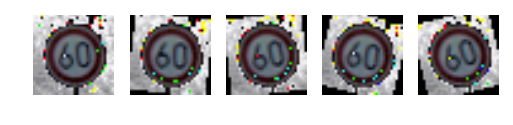

In [7]:
# generate additional training images:
# let's generate some variation of the signals, rotating the images a little
from scipy import ndimage

img_num = 1000

def generate_additional(x_set, y_set, 
                        rotation_variants=2, max_degrees=15,
                       plot=False):
    """ Given a set of images and its Y, create additional images by rotation
        and return them as a tuple of list of the new X and Y
    """
    data_count = len(x_set)
    assert len(x_set) == len(y_set)
    result_x = []
    result_y = []
    with tqdm(total=data_count, disable=plot) as pbar:
        tqdm.write("Generating additional by rotation of %d" % len(y_set))
        for x, y in zip(x_set, y_set):
            if plot:
                plt.subplot(1,rotation_variants*2+1, 1)
                plt.axis('off')
                plt.imshow(x)

            step = max_degrees//rotation_variants
            subplot_x = 2
            for v in range(step, max_degrees+1, step):
                if v != 0:
                    for rotation in (-v, v):
                        rotated = ndimage.interpolation.rotate(x, rotation, reshape=False)
                        if plot:
    #                         print("%d degrees rotation" % rotation)
                            plt.subplot(1,rotation_variants*2+1, subplot_x)
                            subplot_x+=1
                            plt.axis('off')
                            plt.imshow(rotated)
                        if not plot:
                            result_x.append(rotated)
                            result_y.append(y) # the sign type is the same of the origin
            if plot:
                break
            pbar.update()
    return result_x, result_y
        
# let's show an example
_ = generate_additional(X_train_, y_train, 2, plot=True) # create 3 rotated image for each side
    

In [8]:
### Generate data additional data (OPTIONAL!)
# generate additional images by rotation. this will take some time

if additional_data_added is False:
    additional_data = generate_additional(X_train_, y_train, 2) # create 2 rotated images for each side


  0%|          | 32/35288 [00:00<01:52, 312.53it/s]

Generating additional by rotation of 35288


100%|██████████| 35288/35288 [01:39<00:00, 354.19it/s]


In [9]:
if not additional_data_added:
    print("Adding the additional images to the train set")
    X_train_ = np.concatenate([X_train_, additional_data[0]])
    y_train = np.concatenate([y_train, additional_data[1]])
    additiona_data_added = True
print("train set enhanced %d => %d images" %(n_train, len(X_train_)) )

Adding the additional images to the train set
train set enhanced 39209 => 176440 images


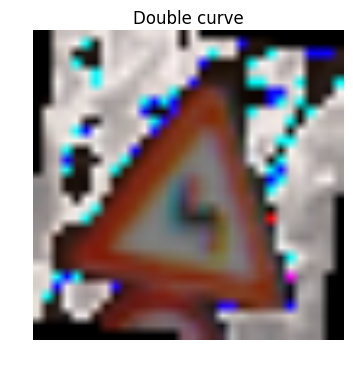

In [19]:
# Visualize some random train image, just to be sure that we didn't mess with X-Y association

img_num = random.randint(0, len(X_train_))

img = X_train_[img_num]
value = y_train[img_num]

plt.title(sign_names[value])
plt.axis('off')
plt.imshow(img)
plt.show()

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I chose 10% of the original training data for the validation set, made via train_test_split.

When using dropout we will need a bigger dataset, so adding some additional data will prove useful.

Considering that the meaning of signs in **invariant to small rotations** (for big rotations some of them definitely change their meaning), we can create additional images rotating them.

Here I create **4 train images more for every single input image**, by rotating simmetrically twice up to 15 degrees.
This helps also to consider less relevant the outer pixels: the rotation is center based so the outer pixels are the most changing ones.


In [20]:
# Define your architecture here.

# I'm using a my own library to help keeping the code available
# on both Jupyter and code.
# the library is included, last version is available here:
# https://github.com/dariosky/self-driving-cars

from sdcnnet.lenet import Lenet

n = Lenet(data, output_depth=43)


input_depth: 3
L1 Tensor("Relu:0", shape=(?, 28, 28, 6), dtype=float32)
P1 Tensor("MaxPool:0", shape=(?, 14, 14, 6), dtype=float32)
Dropout Tensor("dropout/mul:0", shape=(?, 14, 14, 6), dtype=float32)
L2 Tensor("Relu_1:0", shape=(?, 10, 10, 16), dtype=float32)
P2 Tensor("MaxPool_1:0", shape=(?, 5, 5, 16), dtype=float32)
flat: Tensor("Flatten/Reshape:0", shape=(?, 400), dtype=float32)
Lf3 Tensor("Relu_2:0", shape=(?, 120), dtype=float32)
Lf4 Tensor("Relu_3:0", shape=(?, 84), dtype=float32)
Dropout Tensor("dropout_1/mul:0", shape=(?, 84), dtype=float32)
out Tensor("Relu_4:0", shape=(?, 43), dtype=float32)


In [21]:
# once defined the net, is easy to train, test or do the other functions
# on the NNet object
# Train the dataset
n.train(
    save_as='traffic',
    EPOCHS=20,
)

Creating Tensorflow session
Training...

EPOCH 1 ...
Validation Accuracy = 53.69%
EPOCH 2 ...
Validation Accuracy = 70.34%
EPOCH 3 ...
Validation Accuracy = 78.02%
EPOCH 4 ...
Validation Accuracy = 82.56%
EPOCH 5 ...
Validation Accuracy = 85.03%
EPOCH 6 ...
Validation Accuracy = 87.73%
EPOCH 7 ...
Validation Accuracy = 87.73%
EPOCH 8 ...
Validation Accuracy = 89.85%
EPOCH 9 ...
Validation Accuracy = 90.61%
EPOCH 10 ...
Validation Accuracy = 90.92%
EPOCH 11 ...
Validation Accuracy = 91.79%
EPOCH 12 ...
Validation Accuracy = 92.65%
EPOCH 13 ...
Validation Accuracy = 92.94%
EPOCH 14 ...
Validation Accuracy = 93.14%
EPOCH 15 ...
Validation Accuracy = 93.57%
EPOCH 16 ...
Validation Accuracy = 93.98%
EPOCH 17 ...
Validation Accuracy = 93.90%
EPOCH 18 ...
Validation Accuracy = 94.72%
EPOCH 19 ...
Validation Accuracy = 94.54%
EPOCH 20 ...
Validation Accuracy = 94.75%
Model saved as ./tfsaves/traffic
Training done. Last accuracy =  94.75%


In [22]:
# measure accuracy with the test dataset
n.load('traffic') # load from disk (if we don't want to train again)
n.test()

Loading from ./tfsaves/traffic
Test Accuracy = 91.17%


## Some test result notes

I kept 20 epochs, even if the accuract is 
At the end I got over 90% accuracy with a random 15% validation set (using less than 20% gave better train set).


The two dropout levels, one on after the input and one on tail prove to be effective for avoiding overfitting.

### Small things are important
The activation function was important: relu gave me better results than sigmoid or tanh.
The max_pool gave better slightly better results than the avg_pool.
Just changing the sigma value for the initial values of the truncated normal from 1 to 0.1 makes a huge difference

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I kept the LeNet implementation.  
I used max pooling and relu activation, weights are initialized with the truncated normal with 0 mean and 0.1 sigma.

I added 2 dropout levels, with 1/2 chance of deactivation: one after the inputs and another at the end, after the 3 full connected layers.

The pipeline of processes is printed after the `n = NNet(data, output_depth=43)` above.

The NNet class is part of a library with some helper functions and some notes I put also [here in Github](https://github.com/dariosky/self-driving-cars)

With the dropout layer the accuracy seems to have been improved, and we should be less prone to overfitting.


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

The NNet class initializer is based on the `Lenet` using some sane defaults:
the `AdamOptimizer` (a variant of the SGD) that we were using in the class, a batch size of 128 and 20 epochs.

As mentioned using relu as activation helped a lot, and I'm using max_pool as pooling method.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started with the LeNet network, and via trial and error I adjusted some hyperparameter until I got some satisfactory results.

Of course the initial normalization phase made an enormous importance: the images are really etherogeneous and some of them are quite impossible to be distingushed even at an human eye.

The accuracy was quite bad by then, so I started increasing the train set using the rotations.
The new dataset allowed having a bigger training phase, I experimented a balance between number of epochs and I added the two dropout layer after that to try avoiding overfitting (they are disabled for test and for the predictions).

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [23]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
from PIL import Image

def get_my_real_dataset(real_images_folder, expected_values, title=""):
    images = []
    originals = []
    for file_name in sorted(os.listdir(real_images_folder)):
        path = os.path.join(real_images_folder, file_name)
        img = Image.open(path)

        # image = mpimg.imread(path)
        image = np.asarray(img.resize((32,32), Image.ANTIALIAS))
#         print(file_name, image.shape)
        images.append(process_image(image, plot=False))
        originals.append(image)

    img_comb = np.hstack(originals)
    plt.figure(figsize=(18, 16))
    plt.title(title)
    plt.axis('off')
    plt.imshow(img_comb)
    plt.show()
    
    return images, expected_values

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I shot some picture of real signs nearby, and downloaded some other.
I divided the two, in two small sets, one with type of signs that are trained in the dataset and another with unknown types.

The first one gave a wrong detection on a 100km speed-limit. The image is well defined, so it's quite a surprise it wasn't recognised.  
The classificator did a good job with the other 5 signals, recognizing them correctly.

In [24]:
### Run the predictions here.

def show_results(dataset_name):
    xset, yset = data[dataset_name]
    predicted = n.predict(xset)
    n.test(dataset_name=dataset_name)

    for i, (x, y) in enumerate(zip(xset, yset)):
        prediction = predicted[i]
        if y == -1:
            print("Got {wrong} [{wrong_id}]".format(
                    wrong_id = prediction,
                    wrong = sign_names[prediction],
                ))
        elif prediction != y:
            print("WRONG! Got {wrong} [{wrong_id}] instead of {correct} [{correct_id}]".format(
                    wrong_id = prediction,
                    wrong = sign_names[prediction],
                    correct=sign_names.get(y, 'unknown'),
                    correct_id = y
                ))
        else:
            print("CORRECT! Got {correct} [{correct_id}]".format(
                    correct=sign_names[y],
                    correct_id = y))


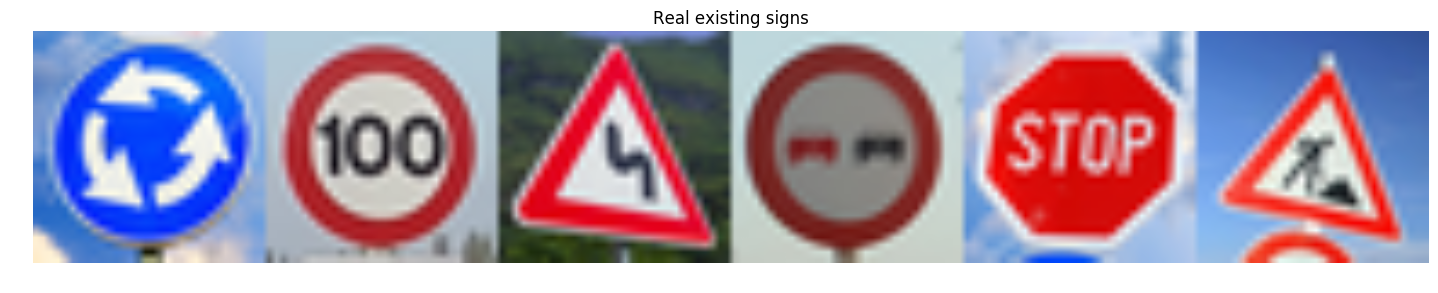

Real_Existing Accuracy = 83.33%
CORRECT! Got Roundabout mandatory [40]
WRONG! Got Roundabout mandatory [40] instead of Speed limit (100km/h) [7]
CORRECT! Got Double curve [21]
CORRECT! Got No passing [9]
CORRECT! Got Stop [14]
CORRECT! Got Road work [25]


In [25]:
# let's see some results for sign that actually exists in the dataset
data['real_existing'] = get_my_real_dataset('./my_images/existing',
                                            [40,7, 21, 9, 14, 25],
                                           'Real existing signs')
show_results('real_existing')

The second set of 5 unknown signals is also interesting: the detections sometime match a sign that is actually similar, for color, sometime like the "Slippery Road" in the middle is quite strange.

For sure for being used in Europe this training dataset should be extended.

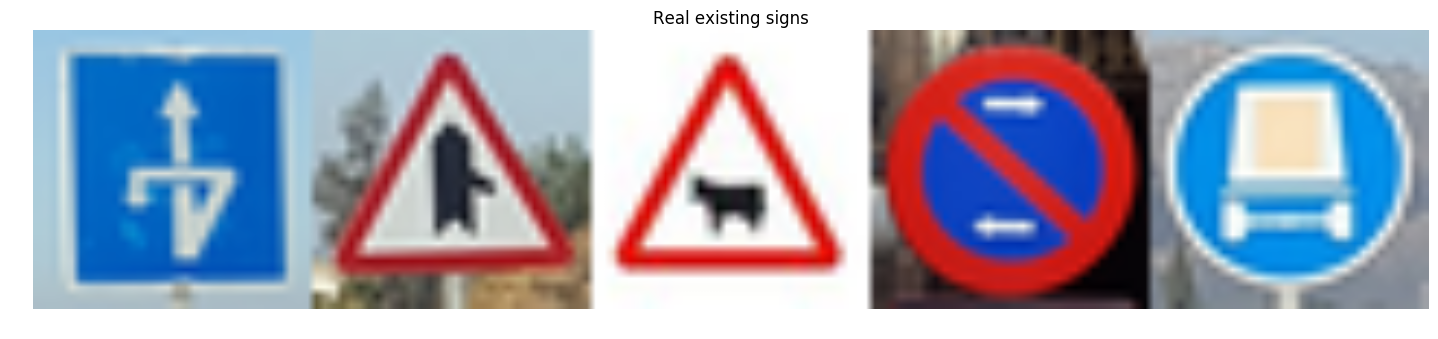

Real_Inexistent Accuracy = 0.00%
Got Keep right [38]
Got Right-of-way at the next intersection [11]
Got Slippery road [23]
Got Keep right [38]
Got Turn left ahead [34]


In [26]:
# let's see some results for sign that actually exists in the dataset
data['real_inexistent'] = get_my_real_dataset('./my_images/inexistent',
                                            [-1]*5,
                                           'Real existing signs')
show_results('real_inexistent')

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**


As mentioned above the accuracy with the 6 real images tested is 83.33%: one had a wrong classification.

In the above section the differences are displayed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Below there is the existing sign run, with the certainty visible.

We are able to classify correctly 5 signs, and the mentioned wrong one is on the 6th position (it's quite unstable, sometime happened to be detected at 3rd position).

The certainty level doesn't seems so satisfactory, it's between 16% and 29% for the correct classifications.

I was thinking to increase the accuracy by using cross validation: randomizing the validation test on the train set every N epochs. So we can use a bigger train set and using more epoch we should get bigger certainty percentages.

In [27]:
def show_certainty(dataset_name):
    xset, yset = data[dataset_name]
    certainty = n.certainty(xset, 5)
    
    for i, (x, certs, predictions) in enumerate(zip(xset, certainty.values, certainty.indices)):
        correct = yset[i]
        for prediction, cert in zip(predictions, certs):
            if prediction != correct:
                print("WRONG {cert:.2f}%! Got {wrong} [{wrong_id}] instead of {correct} [{correct_id}]".format(
                        wrong_id = prediction,
                        wrong = sign_names[prediction],
                        correct=sign_names.get(correct, 'unknown'),
                        correct_id = correct,
                        cert=cert,
                    ))
            else:
                print("CORRECT {cert:.2f}%! Got {correct} [{correct_id}]".format(
                        correct=sign_names[correct],
                        correct_id = correct,
                        cert=cert,
                    ))
                break
        print()
show_certainty('real_existing')

CORRECT 13.42%! Got Roundabout mandatory [40]

WRONG 1.29%! Got Roundabout mandatory [40] instead of Speed limit (100km/h) [7]
WRONG 1.10%! Got Vehicles over 3.5 metric tons prohibited [16] instead of Speed limit (100km/h) [7]
WRONG 0.79%! Got Speed limit (20km/h) [0] instead of Speed limit (100km/h) [7]
WRONG 0.33%! Got Speed limit (30km/h) [1] instead of Speed limit (100km/h) [7]
WRONG 0.21%! Got Speed limit (50km/h) [2] instead of Speed limit (100km/h) [7]

CORRECT 8.31%! Got Double curve [21]

CORRECT 12.93%! Got No passing [9]

CORRECT 24.30%! Got Stop [14]

CORRECT 29.62%! Got Road work [25]



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.